## 앙상블 학습
- 여러 개의 분류기를 생성하고 그 예측을 결합함으로써 단일 분류기보다 정확한 최종 예측을 도출하는 기법
- 정형 데이터에서 유용함
- XGboodst, LightGBM
- 보팅(서로 다른 알고리즘을 가진 분류기를 결합), 배깅(같은 유형의 알고리즘을 기반으로 하면서 데이터 샘플링을 서로 다르게 한 후 보팅), 부스팅, 스태킹 등 다양한 앙상블 방법이 있음.
  
  배깅 : 개별 분류기에 데이터를 샘플링하여 추출하는 부트스트래핑 분할 방식을 사용 후 개별적으로 예측하고 데이터의 중첩 허용
  
  부스팅 : 여러 개의 분류기가 학습을 수행하되 다음 분류기에는 올바르게 예측할 수 있도록가중치를 지속적으로 부여함.
  
  스태킹 : 여러 다른 모델의 예측 결괏값을 다시 학습 데이터로 만들어 다른 모델을 재학습시킨 후 결과를 예측하는 방식

### 보팅 유형 : 하드 보팅과 소프트 보팅
- **하드 보팅** : 예측 결괏값들 중 다수의 분류기가 겨정한 값을 최종 보팅 결괏값으로 선정
- **소프트 보팅** : 분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균해 확률이 가장 높은 레이블 값을 최종 보팅 값으로 선정
- 일반적으로 하드 보팅보다 소프트 보팅이 예측 성능이 좋음.

#### 보팅 분류기
VotingClassifier 분류기
1. estimators : 리스트 값으로, 보팅에 사용될 여러 개의 분류기 객체들을 튜플 형식으로 입력받음.
2. voting : soft/hard 중 택1
3. 보팅이 무조건 기반 분류기보다 예측 성능이 뛰어난 것은 아니지만 앙상블 기법은 단일 ML 알고리즘보다 성능이 나은 경우가 많음. 현실 세계는 예측 불가능한 규칙으로 구성되어 있는데 다양한 관점의 알고리즘을 사용하면 (앙상블) 높은 유연성을 가지고 더 나은 성능과 해결책을 제시할 수 있음.
4. ML의 평가 요소 중 하나 : 높은 유연성을 가지고 현실에 대처할 수 있는가 ?
5. 결정 트리 알고리즘의 장점은 그대로 취하되 다양한 상황을 학습하게 함으로써 변향-분산 트레이드오프의 효과를 극대화할 수 있음.

### 랜덤 포레스트
- 배깅의 대표적인 알고리즘
- 앙상블 알고리즘 중 빠른 속도를 가지고 다양한 영역에서 높은 예측 성능을 가짐
- 결정 트리의 쉽고 직관적인 것이 장점으로, 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 개별 학습을 수행한 뒤 보팅을 통해 예측 결정
- 전체 데이터 중 일부가 중첩되게 샘블링 (bootstraping)
- n_estimators 파라미터 : 결정 트리 개수

### GBM
- AdaBoost(에이다부스트) : 오류 데이터에 가중치를 부여하면서 부스팅을 수행하는 알고리즘.
  
  [수행 과정]
  1. 첫 번째 약한 학습기가 분류 기준 1로 +, -를 분류함. 1에 동그라미가 쳐져 있으면 잘못 분류된 오류 데이터임.
  2. 오류 데이터에 대해 가중치 값을 부여함. 가중치가 부여된 오류 데이터는 다음 약한 학습기가 더 잘 분류할 수 있도록 크기가 커짐
  3. 분류 기준 2로 +과 -를 분류함. -1에 동그라미가 쳐져 있으면 잘못 분류된 오류 데이터임.
  4. 잘못 분류된 오류 데이터에 대해 다음 약한 학습기가 잘 분류할 수 있도록 더 큰 가중치를 부여함
  5. 분류 기준 3으로 +과 -를 분류하고 오류 데이터를 찾음.
  6. 이러한 과정을 통해 순차적으로 오류 값에 가중치를 부여한 예측 결정 기준을 **모두 결합해** 예측을 수행함. 개별 약한 학습기보다 훨씬 정확도가 높아짐.
- GradientBoostingMachine : 에이다부스트와 유사하나, 가중치 업데이트를 **경사 하강법**으로 수행.

  1. 오류 값 = (실제 값) - (예측값) = y - F(x)
  2. 경사 하강법 : 오류식 h(x)를 최소화하는 방향성을 가지고 반복적으로 가중치 값을 업데이트하는 것.
  3. CART 기반 타 알고리즘과 마찬가지로 분류는 물론 회귀도 가능함.
  4. 일반적으로 랜덤 포레스트보다 나은 예측 성능을 갖는 경우가 많음. 그러나 수행 시간이 오래 걸리고 하이퍼 파라미터 튜닝 노력도 필요
  5. 순차적인 예측 오류 보정을 통해 학습을 수행하므로 멀티 CPU 코어 시스템을 사용하더라도 병렬 처리가 지원되지 않음. 이와 달리 랜덤 포레스트는 더 쉽게 예측 결과를 도출할 수 있음.

#### GBM 하이퍼 파라미터 및 튜닝
- loss : 경사 하강법에서 사용할 비용 함수 지정. 특별한 이유가 없으면 기본값인 deviance 적용
- learning_rate : GBM이 학습을 진행할 때마다 적용하는 학습률. Weak learner가 순차적으로 오류 값을 보정해 나가는 데 적용하는 계수로, 0~1 사이 값을 지정할 수 있고 기본 값은 0.1
- n_estimators : weak learner의 개수로 learning_rate와 상호 보완적으로 조합해 사용함. 기본 값은 100
- subsamples : weak learner가 학습에 사용하는 데이터 샘플링 비율. 기본 값은 1. (=전체 데이터를 기반으로 학습한다.) 과적합이 염려되는 경우 subsample을 1보다 작은 값으로 설정

### XGBoost(eXtra Gradient Boost)
- 일반적으로 다른 머신러닝보다 분류와 회귀에 있어 뛰어난 예측 성능을 나타냄.
- GBM에 기반하지만 GBM의 단점인 느린 수행 시간과 과적합 규제의 부재 등의 문제를 해결함. 과적합에 강한 내구성을 가짐
- 병렬 CPU 환경에서 병렬 학습이 가능해 기존 GBM보다 빠른 학습이 가능함.
- Tree Pruning (가지치기) : max_depth로 분할 깊이를 조정하기도 하지만 tree pruning으로 더 이상 긍정 이득이 없는 분할을 가지치기하여 분할 수를 더 줄일 수 있음.
- 자체 내장된 CV : 반복 수행 시마다 내부 학습 데이터 세트와 평가 데이터 세트에 대한 교차 검증을 수행해 최적화된 반복 수행 횟수를 가질 수 있음. 반복 횟수의 지정이 아니라 평가 값이 최적화 되면 반복을 중단할 수 있는 조기 중단 기능을 가지고 있음.
- 결손값 자체 처리 : 결손값을 자체적으로 처리할 수 있음.
- 사이킷런 프레임워크를 기반으로 한 것이 아니기 때문에 사이킷런 고유의 아키텍처가 적용될 수 없고 cross_val_score, gridsearchcv 등을 함께 사용할 수 없음.
- Wrapper Class를 제공하여 사이킷런과 연동 가능함

#### 파이썬 래퍼 XGBoost 하이퍼 파라미터 
- 파이썬 래퍼와 사이킷런 래퍼의 하이퍼 파라미터 규칙이 약간 다르므로 유의해야 함.
1. 주요 일반 파라미터 : booster, silent, nthread
2. 주요 부스터 파라미터 : eta [default = 0.3, alias : learning_rate], num_boost_rounds, min_child_weight, gamma, max_depth, sub_samples, colsample_bytree, lambda, alpha, scale_pos_weight
3. 학습 태스트 파라미터 : objective, binary:logistic, multi:softmax, multi:softprob, eval_metric 등 

#### 과적합 문제가 심각하다면 
1. eta 값을 낮춤
2. max_depth 값을 낮춤
3. min_child_weight 값을 높임
4. gamma 값을 높임.

In [1]:
# 보팅 방식의 앙상블을 이용한 위스콘신 유방암 데이터 세트 예측 분석
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()
data_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
import warnings
warnings.filterwarnings('ignore')
# 로지스틱 회귀와 KNN을 기반으로 한 소프트 보팅으로 만든 새로운 보팅 분류기
# 개별 모형은 로지스틱 회귀와 KNN임.
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators = [('LR', lr_clf), ('knn', knn_clf)], voting = 'soft')
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   test_size = 0.2, random_state=156)
# votingclassifier 학습, 예측, 평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('voting 분류기 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

# 개별 모델의 학습, 예측, 평가
classifiers  = [lr_clf, knn_clf]
for classifier in classifiers :
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도 {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

voting 분류기 정확도 : 0.9474
LogisticRegression 정확도 0.9386
KNeighborsClassifier 정확도 0.9386


보팅 분류기의 정확도가 조금 높게 나타남. 

In [3]:
def get_new_feature_name_df(old_feature_name_df):
    #column_name으로 중복된 컬럼명에 대해서는 중복 차수 부여, col1, col1과 같이 2개의 중복 컬럼이 있을 경우 1, 2 
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                           if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df
    
def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('C:/Users/gyw78/Desktop/ewha/3-1/esaa/과제/human+activity+recognition+using+smartphones/human_activity/human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 feature명을 새롭게 수정하는 get_new_feature_name_df()를 이용하여 새로운 feature명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('C:/Users/gyw78/Desktop/ewha/3-1/esaa/과제/human+activity+recognition+using+smartphones/human_activity/human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('C:/Users/gyw78/Desktop/ewha/3-1/esaa/과제/human+activity+recognition+using+smartphones/human_activity/human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('C:/Users/gyw78/Desktop/ewha/3-1/esaa/과제/human+activity+recognition+using+smartphones/human_activity/human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('C:/Users/gyw78/Desktop/ewha/3-1/esaa/과제/human+activity+recognition+using+smartphones/human_activity/human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [4]:
# 랜덤 포레스트
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset()을 이용해 학습/테스트용 df 변환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state = 0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도 : {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도 : 0.9253


In [6]:

from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators' : [100],
    'max_depth' : [6,8,10,12],
    'min_samples_leaf' : [8,12,18],
    'min_samples_split' : [8,16,20] }
# RF 객체 생성 후 Gridsearchcv 수행
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 2, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼파라미터 : \n', grid_cv.best_params_)
print('최고 예측 정확도 : {0:.4f}'.format(grid_cv.best_score_))


최적 하이퍼파라미터 : 
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도 : 0.9180


In [7]:
rf_clf1 = RandomForestClassifier(n_estimators = 300, max_depth = 10,
                                min_samples_leaf = 8, min_samples_split =8,
                                random_state = 0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도 : 0.9165


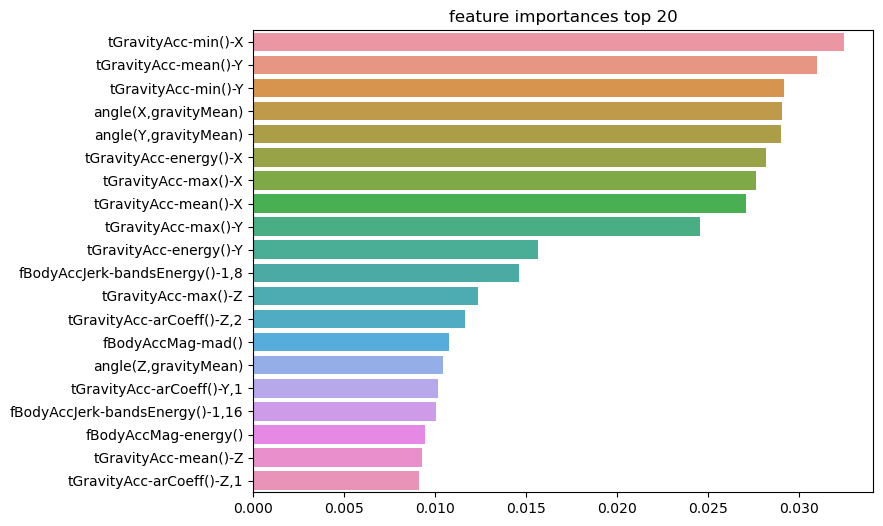

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending = False)[:20]
plt.figure(figsize = (8,6))
plt.title('feature importances top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

# tGravityAcc-min()과 tGravityAcc-mean() 등이 높은 피처 중요도를 가짐.

In [26]:
# GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()
# gbm 수행 시간 측정을 위함. 시작 시간 설정
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state = 0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도 : {0:.4f}'.format(gb_accuracy))
print('GBM 수행 시간: {0:.1f}초'.format(time.time() - start_time))

GBM 정확도 : 0.9389
GBM 수행 시간: 3795.2초


In [ ]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators' : [100,500],
    'learning_rate' : [0.05, 0.1]
}
grid_cv = GridSearchCV(gb_clf, param_grid = params, cv=2, verbose =1)
grid_cv.fit(X_train, y_train)
print('최적 하이퍼 파라미터 :\n', grid_cv.best_params_)
print('최고 예측 정확도 : {0:.4f}'.format(grid_cv.best_score_))

# learning_rate = 0.5, n_estimators = 500일 때 2개의 CV 셑에서 90.1% 가 최고로 도출.

Fitting 2 folds for each of 4 candidates, totalling 8 fits


In [ ]:
# gridsearchcv를 이용해 최적으로 학습된 estimator로 예측 수행
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도 : {0:.4f}'.format(gb_accuracy))

GBM은 과적합에도 강하고 뛰어난 예측 성능을 가진 알고리즘이지만 수행 시간이 오래 걸린다는 단점이 있음. 

In [9]:
import xgboost
from xgboost import XGBClassifier

In [10]:
print(xgboost.__version__)

1.7.3


위스콘신 유방암 데이터 세트 : 종양의 크기, 모양 등의 다양한 속성 값을 기반으로 악성 종양(malignant tumor)인지 양성 종양(benign tumor)인지를 분류한 데이터 세트, 

In [11]:
# 파이썬 래퍼 XGBoost 적용 - 위스콘신 유방암 예측
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target
cancer_df = pd.DataFrame(data = X_features, columns = dataset.feature_names)
cancer_df['target'] = y_label
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [12]:
# 레이블 값의 분포 확인
# 양성 : 1, 악성 : 0
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
target
1    357
0    212
Name: count, dtype: int64


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label,
                                                   test_size=0.2, random_state=156)
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


In [14]:
# 파이썬 래퍼 xgboost는 사이킷런 래퍼 xgboost 와 달리 학습용, 테스트용 데이터 세트를 위해 별도의 객체인 DMatrix를 생성
dtrain = xgb.DMatrix(data = X_train, label = y_train)
dtest = xgb.DMatrix(data = X_test, label = y_test)

In [15]:
params = {
    'max_depth' : 3, # 트리 최대 깊이는 3
    'eta' : 0.1, # 학습률 eta (XGBoost는 learning_rate)
    'objective' : 'binary:logistic', # 목적함수는 0과 1 이진 분류이므로 이진 로지스틱
    'eval_metric' : 'logloss', # 오류함수의 평가성능지표 : logloss
    'early_stoppings' : 100} # 더이상 개선 없을 때 조기 중단 가능한 최소 반복 횟수
num_rounds = 400 # num_rounds(부스팅 반복 횟수) 400회

# 반복마다 eval_set으로 지정된 데이터 세트에서 eval_metric으로 지정된 평가 지표로 예측 오류 측정

In [16]:
# train 데이터 세트는 'train', eval(test) 데이터 세트는 'eval'
wlist = [(dtrain, 'train'), (dtest, 'eval')]
# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params = params, dtrain = dtrain,
                     num_boost_round = num_rounds, early_stopping_rounds = 100, evals = wlist)

[23:49:04] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "early_stoppings" } are not used.

[0]	train-logloss:0.60969	eval-logloss:0.61352
[1]	train-logloss:0.54080	eval-logloss:0.54784
[2]	train-logloss:0.48375	eval-logloss:0.49425
[3]	train-logloss:0.43446	eval-logloss:0.44799
[4]	train-logloss:0.39055	eval-logloss:0.40911
[5]	train-logloss:0.35415	eval-logloss:0.37498
[6]	train-logloss:0.32122	eval-logloss:0.34571
[7]	train-logloss:0.29259	eval-logloss:0.32053
[8]	train-logloss:0.26747	eval-logloss:0.29721
[9]	train-logloss:0.24515	eval-logloss:0.27799
[10]	train-logloss:0.22569	eval-logloss:0.26030
[11]	train-logloss:0.20794	eval-logloss:0.24604
[12]	train-logloss:0.19218	eval-logloss:0.23156
[13]	train-logloss:0.17792	eval-logloss:0.22005
[14]	train-logloss:0.16522	eval-logloss:0.20857
[15]	train-logloss:0.15362	eval-logloss:0.19999
[16]	train-logloss:0.14333	eval-logloss:0.19012
[17]	train-logloss:0.13398	eval-logloss:0.181

In [17]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결괏값을 10개만 표시, 예측 확률값으로 표시됨')
print(np.round(pred_probs[:10], 3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 pred 저장
preds = [1 if x>0.5 else 0 for x in pred_probs]
print('예측값 10개 표시 :', preds[:10])

predict() 수행 결괏값을 10개만 표시, 예측 확률값으로 표시됨
[0.934 0.003 0.91  0.094 0.993 1.    1.    0.999 0.997 0.   ]
예측값 10개 표시 : [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
def get_clf_eval(y_test, pred=None, pred_proba=None) :
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # roc_auc 추가
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, \
    F1 : {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
get_clf_eval(y_test, preds, pred_probs)

오차 행렬
[[35  2]
 [ 1 76]]
정확도 : 0.9737, 정밀도 : 0.9744, 재현율 : 0.9870,     F1 : 0.9806, AUC:0.9951


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

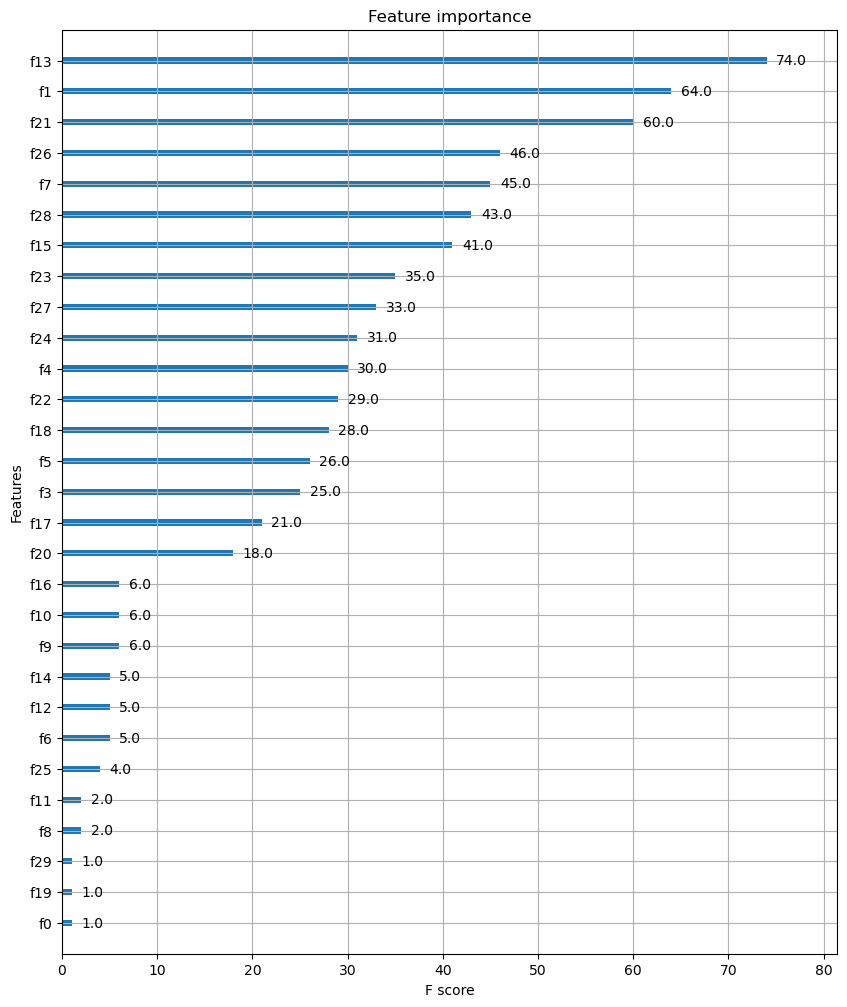

In [19]:
# xgboost에 내장된 시각화
# plot_importance : 피처의 중요도를 막대그래프 형태로 나타냄, 넘파이 기반의 피처 데이터로 학습 시 피처명을 제대로 알 수 없으므로 f0, f1 등으로 나열
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize = (10,12))
plot_importance(xgb_model, ax=ax)

In [20]:
xgboost.cv(params, dtrain, num_boost_round = 10, nfold = 3, stratified = False, folds = None, metrics = (),
          obj = None, feval = None, maximize =False, early_stopping_rounds = None, fpreproc = None, as_pandas = True, 
          verbose_eval = None, show_stdv = True, seed = 0, callbacks = None, shuffle = True)

[23:49:53] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "early_stoppings" } are not used.

[23:49:53] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "early_stoppings" } are not used.

[23:49:53] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "early_stoppings" } are not used.



,train-logloss-mean,train-logloss-std,test-logloss-mean,test-logloss-std
0,0.610037,0.000064,0.617448,0.004961
1,0.541817,0.000203,0.555140,0.008989
2,0.483716,0.000955,0.503529,0.012238
3,0.434676,0.001311,0.459869,0.015795
4,0.392310,0.001686,0.423058,0.016788
5,0.355129,0.001391,0.391187,0.019785
6,0.322530,0.001908,0.361119,0.019378
7,0.294159,0.001618,0.337139,0.021086
8,0.269083,0.002068,0.314903,0.019971
9,0.246208,0.001940,0.295012,0.019237


In [21]:
# 사이킷런 래퍼 xgboost 클래스인 xgbclassifier 임포트
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate = 0.1,
                           max_depth = 3)
xgb_wrapper.fit(X_train, y_train)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

In [22]:
get_clf_eval(y_test, w_preds, w_pred_proba)

오차 행렬
[[35  2]
 [ 1 76]]
정확도 : 0.9737, 정밀도 : 0.9744, 재현율 : 0.9870,     F1 : 0.9806, AUC:0.9951


In [23]:
from xgboost import XGBClassifier
xgb_wrapper = XGBClassifier(n_estimators = 400, learning_rate = 0.1, 
                           max_depth = 3)
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric = 'logloss',
               eval_set = evals, verbose = True)
ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

[0]	validation_0-logloss:0.61352
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	validation_0-logloss:0.17473
[19]	validation_0-logloss:0.16766
[20]	validation_0-logloss:0.15820
[21]	validation_0-logloss:0.15472
[22]	validation_0-logloss:0.14895
[23]	validation_0-logloss:0.14331
[24]	validation_0-logloss:0.13634
[25]	validation_0-logloss:0.13278
[26]	validation_0-logloss:0.12791
[27]	validation_0-logloss:0.12526
[28]	validation_0-logloss:0.11998
[29]	validation_0-loglos

In [24]:
get_clf_eval(y_test, ws100_preds, ws100_pred_proba)

오차 행렬
[[34  3]
 [ 1 76]]
정확도 : 0.9649, 정밀도 : 0.9620, 재현율 : 0.9870,     F1 : 0.9744, AUC:0.9954


In [25]:
# early_stopping_round를 10으로 설정하고 재학습
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds = 10,
               eval_metric= 'logloss', eval_set=evals, verbose = True)

ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]
get_clf_eval(y_test, ws10_preds, ws10_pred_proba)

[0]	validation_0-logloss:0.61352
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	validation_0-logloss:0.17473
[19]	validation_0-logloss:0.16766
[20]	validation_0-logloss:0.15820
[21]	validation_0-logloss:0.15472
[22]	validation_0-logloss:0.14895
[23]	validation_0-logloss:0.14331
[24]	validation_0-logloss:0.13634
[25]	validation_0-logloss:0.13278
[26]	validation_0-logloss:0.12791
[27]	validation_0-logloss:0.12526
[28]	validation_0-logloss:0.11998
[29]	validation_0-loglos